In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
print('Malignant : ',len(cancer.data[cancer.target==1]))
print('Benign    : ',len(cancer.data[cancer.target==0]))

Malignant :  357
Benign    :  212


In [13]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Visualize the data

In [6]:
import numpy as np
import matplotlib.pyplot as plt 

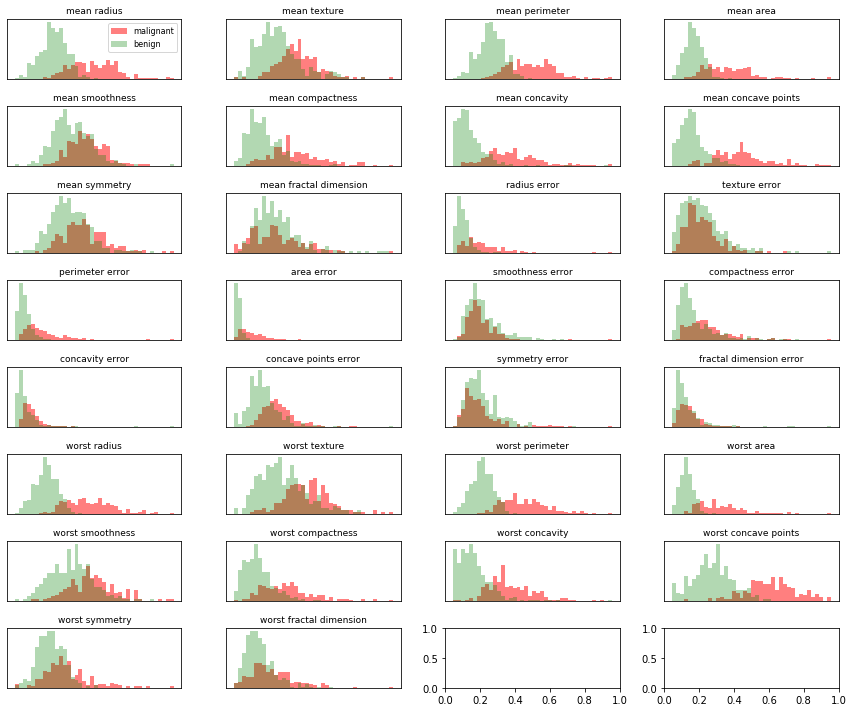

In [15]:
fig,axes =plt.subplots(8,4, figsize=(12, 10))

malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign

ax=axes.ravel()   # flat axes with numpy ravel
for i in range(30):
    _,bins=np.histogram(cancer.data[:,i],bins=40)
    ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
    ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is for transparency in the overlapped region 
    ax[i].set_title(cancer.feature_names[i],fontsize=9)
    ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful
    ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

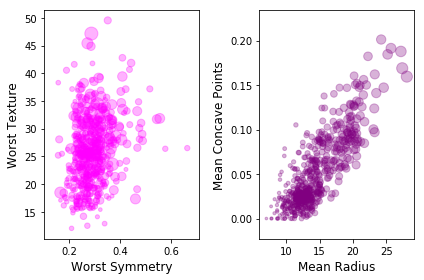

In [16]:
import pandas as pd

cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# convert to pandas data-frame

plt.subplot(1,2,1) # fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], 
            s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)

plt.subplot(1,2,2) # 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], 
            s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

# Appying PCA

## StandardScaler

Before applying PCA, we scale our data such that each feature has unit variance. This is necessary because fitting algorithms highly depend on the scaling of the features. 

Here we use the `StandardScaler` module for scaling the features individually. StandardScaler subtracts the mean from each features and then scale to unit variance.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler() #instantiate
scaler.fit(cancer.data) # compute the mean and standard which will be used in the next command
X_scaled=scaler.transform(cancer.data)# fit and transform can be applied together and I leave that as a simple exercise

after scaling minimum [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]


In [22]:
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print("After scaling minimum \n", X_scaled.min(axis=0))
print("After scaling maximum \n", X_scaled.max(axis=0))

After scaling minimum 
 [-2.0296483  -2.22924851 -1.98450403 -1.45444309 -3.11208479 -1.61013634
 -1.11487284 -1.26181958 -2.74411707 -1.81986478 -1.05992413 -1.55426392
 -1.04404888 -0.73782907 -1.77606498 -1.2980982  -1.05750068 -1.91344745
 -1.53289003 -1.09696818 -1.72690052 -2.22399401 -1.69336103 -1.22242284
 -2.68269492 -1.4438784  -1.30583065 -1.74506282 -2.16095969 -1.60183949]
After scaling maximum 
 [ 3.97128765  4.65188898  3.97612984  5.25052883  4.77091122  4.56842498
  4.24358882  3.92792966  4.48475086  4.91091929  8.90690934  6.65527935
  9.46198577 11.04184226  8.02999927  6.14348219 12.0726804   6.64960079
  7.07191706  9.85159257  4.09418939  3.88590505  4.28733746  5.9301724
  3.95537411  5.11287727  4.7006688   2.68587702  6.04604135  6.84685604]


In [23]:
print("After scaling average: \n", X_scaled.mean(axis=0))
print("After scaling standar derivation: \n", X_scaled.std(axis=0))

After scaling average: 
 [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]
After scaling standar derivation: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


## PCA to the StandardScaler data

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca=PCA(n_components=3) 
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled)

#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)

shape of X_pca (569, 3)


In [28]:
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio*100) 

[60.95021689 26.11802022 12.93176289]


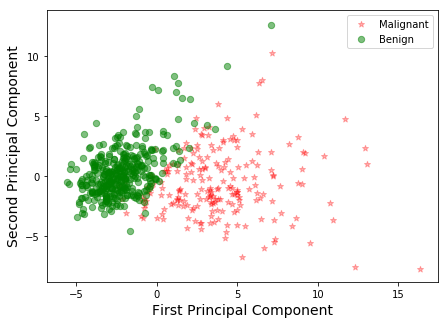

In [32]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]

labels=cancer.target
cdict={0:'red',1:'green'}
labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}

fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')

for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference


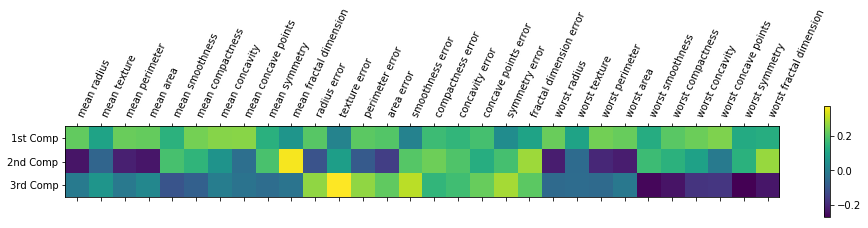

In [34]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

In [36]:
pca.components_.shape

(3, 30)

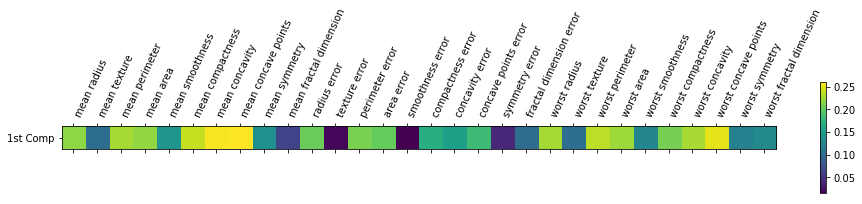

In [38]:
plt.matshow(pca.components_[0:1,:],cmap='viridis')
plt.yticks([0],['1st Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
#plt.tight_layout()
plt.show()# 

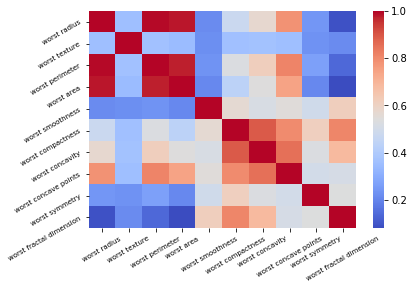

In [39]:
feature_worst=list(cancer_df.columns[20:31]) # select the 'worst' features

import seaborn as sns

s=sns.heatmap(cancer_df[feature_worst].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()

# Tutorial 2:

In [45]:
sns.set()

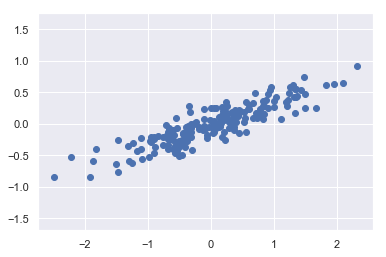

In [46]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [41]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [43]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


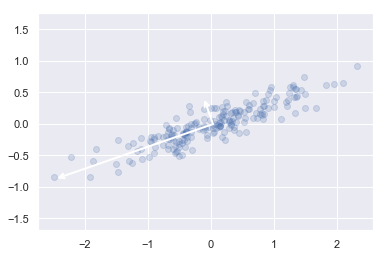

In [47]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [48]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


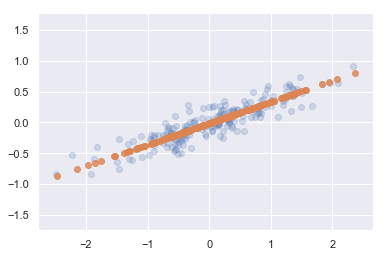

In [49]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Tutorial 3:

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [53]:
digits.target.shape

(1797,)

In [51]:
digits.data.shape

(1797, 64)

### Projection into 2 dimensional spaces

In [116]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
projected.shape

(1797, 64)

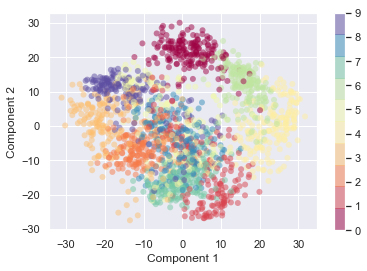

In [59]:
plt.scatter(projected[:,0], projected[:,1],
           c = digits.target, alpha = 0.5, edgecolor = 'none',
           cmap = plt.cm.get_cmap('Spectral', 10))
plt.colorbar()
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

### Choosing the number of components

In [60]:
pca = PCA()
pca.fit(digits.data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Cummulative Variance Ratio')

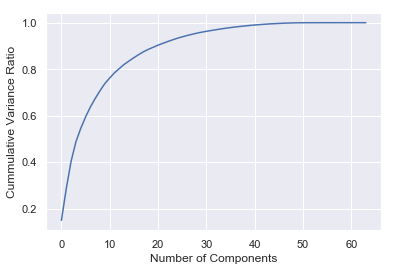

In [61]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance Ratio')

### PCA components: Vector that shows the directions of the component 

In [70]:
for i, vector in enumerate(pca.components_[:10]):
    print('Component %d -- Norm of the vector: %.2f' %(i,np.linalg.norm(pca.components_[i])))

Component 0 -- Norm of the vector: 1.00
Component 1 -- Norm of the vector: 1.00
Component 2 -- Norm of the vector: 1.00
Component 3 -- Norm of the vector: 1.00
Component 4 -- Norm of the vector: 1.00
Component 5 -- Norm of the vector: 1.00
Component 6 -- Norm of the vector: 1.00
Component 7 -- Norm of the vector: 1.00
Component 8 -- Norm of the vector: 1.00
Component 9 -- Norm of the vector: 1.00


### PCA explained variance ratios: The sorted absolute value of these unnormalized vectors

In [72]:
pca.explained_variance_[:10]/pca.explained_variance_ratio_[:10]

array([1202.14771216, 1202.14771216, 1202.14771216, 1202.14771216,
       1202.14771216, 1202.14771216, 1202.14771216, 1202.14771216,
       1202.14771216, 1202.14771216])

In [75]:
for i, vector in enumerate(pca.explained_variance_ratio_[:10]):
    print('Component %d -- Contribution: %.2f %%' %(i,vector*100))

Component 0 -- Contribution: 14.89 %
Component 1 -- Contribution: 13.62 %
Component 2 -- Contribution: 11.79 %
Component 3 -- Contribution: 8.41 %
Component 4 -- Contribution: 5.78 %
Component 5 -- Contribution: 4.92 %
Component 6 -- Contribution: 4.32 %
Component 7 -- Contribution: 3.66 %
Component 8 -- Contribution: 3.35 %
Component 9 -- Contribution: 3.08 %


## Visualize the data

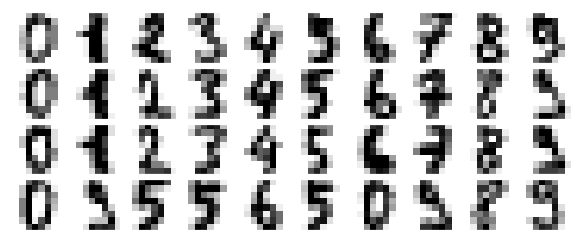

In [64]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10, figsize = (10,4),
                            subplot_kw={'xticks':[], 'yticks': []},
                            gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap = 'binary', interpolation = 'nearest',clim = (0,16))

plot_digits(digits.data)

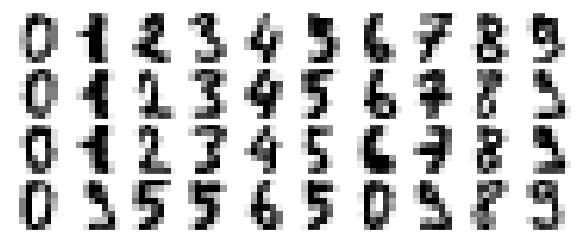

In [66]:
def plot_digits(data):
    fig, axes = plt.subplots(4,10, figsize = (10,4),
                            subplot_kw={'xticks':[], 'yticks': []},
                            gridspec_kw=dict(hspace = 0.1, wspace = 0.1))
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap = 'binary')

plot_digits(digits.data)

## Visualize the inverse transform of PCA

In [76]:
pca = PCA(5)
projected = pca.fit_transform(digits.data)
projected.shape

(1797, 5)

In [77]:
X_transform = pca.inverse_transform(projected)
X_transform.shape

(1797, 64)

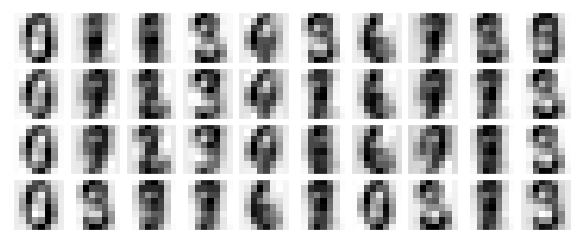

In [83]:
pca = PCA(3)
projected = pca.fit_transform(digits.data)
X_transform = pca.inverse_transform(projected)
plot_digits(X_transform)

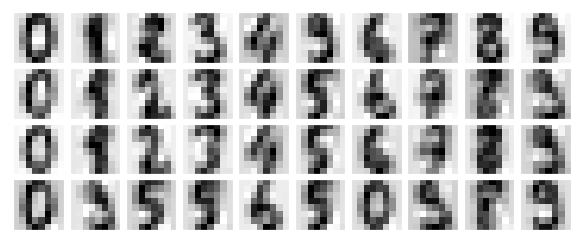

In [82]:
pca = PCA(10)
projected = pca.fit_transform(digits.data)
X_transform = pca.inverse_transform(projected)
plot_digits(X_transform)

# Tutorial 4: Eigenfaces - A very interesting name

In [84]:
from sklearn.datasets import fetch_lfw_people

In [85]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [86]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [87]:
faces.data.shape

(1348, 2914)

In [88]:
faces.images.shape

(1348, 62, 47)

In [148]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [150]:
faces.target.max()

7

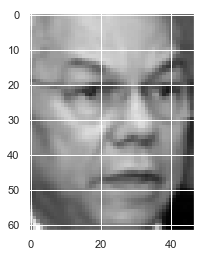

In [96]:
plt.imshow(faces.images[0], cmap = 'binary_r')

In [106]:
pca = PCA(20)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [108]:
pca.explained_variance_ratio_.shape

(20,)

In [107]:
pca.components_.shape

(20, 2914)

In [119]:
# Comments: transforms to a 20-dimensional space, which is obvious because I force the PCA to have 20 dimension
# Meanwhile, why pca.shape[1] is the same as image size? Image is a 2914-dimensional space.
# Since the direction is within the original dimensional space, it must be the same size.
# The first (1,2914) is the direction that has largest variance?
# Yes, it is.

### Now, not the conventional PCA - Randomize for faster convergence in high dimensional space

In [122]:
pca = PCA(150,svd_solver="randomized")

In [123]:
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
  svd_solver='randomized', tol=0.0, whiten=False)

In [124]:
pca.components_.shape

(150, 2914)

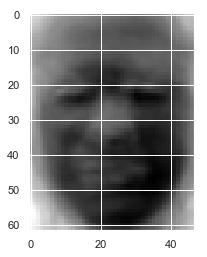

In [125]:
# This is the direction which has the largest variance? Also another face? - Yes, it must be
plt.imshow(pca.components_[0].reshape(62,47), cmap = 'binary_r')

`plt.subplots()` is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 

Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png'). You certainly don't have to use the returned figure object but many people do use it later so it's common to see. 

Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

`fig, ax = plt.subplots()`

is more concise than this:

`fig = plt.figure()
ax = fig.add_subplot(111)`


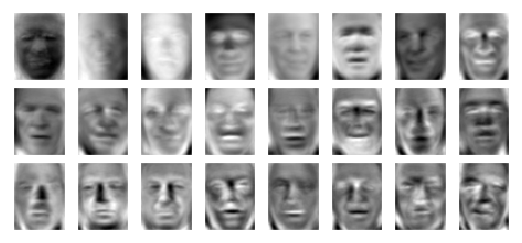

In [126]:
fig, axes = plt.subplots(3,8, figsize = (9,4),
                      subplot_kw={'xticks':[], 'yticks':[]},
                      gridspec_kw= dict(hspace = 0.1, wspace = 0.1))
for i,ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47), cmap = 'binary_r')

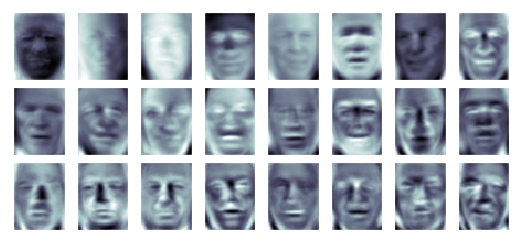

In [127]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips. Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

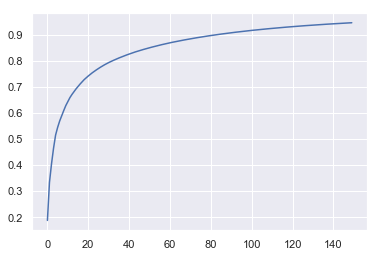

In [129]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Visualize the data - Again, this is exactly what I like

In [141]:
projected = pca.transform(faces.data)
X_reconstructed = pca.inverse_transform(projected)

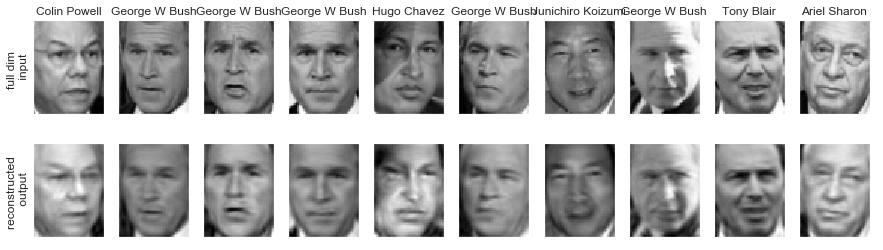

In [147]:
fig, axes = plt.subplots(2, 10, figsize=(15, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.3, wspace=0.2))
for i in range(10):
    axes[0,i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    axes[0,i].set_title(faces.target_names[faces.target[i]])
    axes[1,i].imshow(X_reconstructed[i].reshape(62, 47), cmap='binary_r')

axes[0,0].set_ylabel('full dim \n input')
axes[1,0].set_ylabel('reconstructed \n output')
plt.show()

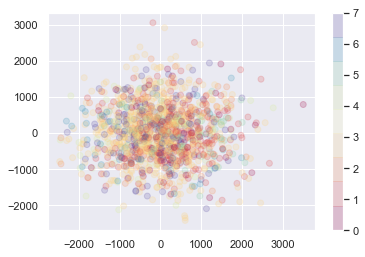

In [155]:
plt.scatter(projected[:,0], projected[:,1],
           c = faces.target, cmap = plt.cm.get_cmap('Spectral',9), alpha = 0.2, edgecolors=None)
plt.colorbar()